# VAR
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

## 1 - Data Prep

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [25]:
root = "../"
path = root + 'CSV/TabNet/Internacoes/'
all_files = glob.glob(path + "*")
df_diseases = pd.DataFrame()
list_of_diseases = []
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split(".")[0]
    list_of_diseases.append(disease)
    df_disease = pd.read_csv(path + file_name, sep=";")
    df_disease = df_disease[df_disease["Município"] == "355030 São Paulo"]
    if not df_disease.empty:
        df_disease= df_disease.filter(regex='2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018', axis=1)
        df_disease = df_disease.transpose()
        df_disease.columns = [disease]
        df_disease = df_disease.replace("-",0)
        df_disease = df_disease.astype(int)
        df_diseases[disease] = df_disease[disease]
df_diseases = df_diseases.fillna(0)

In [26]:
from datetime import datetime
month_dic = {
    "Jan": "January",
    "Fev": "February",
    "Mar": "March",
    "Abr": "April",
    "Mai": "May",
    "Jun": "June",
    "Jul": "July",
    "Ago": "August",
    "Set": "September",
    "Out": "October",
    "Nov": "November",
    "Dez": "December"
}
indexes = []
for i,e in enumerate(df_diseases.index): 
    ano = e.split("/")[0]
    mes = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_diseases.index = indexes
df_diseases.head()

,ABORTO_ESPONTÂNEO,ABORTO_POR_RAZÕES_MÉDICAS,ACIDENTES_DE_TRANSPORTE,ACID_VASCULAR_CEREBR_ISQUÊM_TRANSIT_E_SÍNDR_CORREL,ACID_VASCULAR_CEREBR_NÃO_ESPEC_HEMORRÁG_OU_ISQUÊM,AFECÇ_HEMORRÁG_E_OUTR_DOENÇ_SANG_E_ÓRG_HEMATOPOÉT,AFOGAMENTO_E_SUBMERSÃO_ACIDENTAMENTE,AGRESSÕES,ALGUNS_TRANSTORNOS_ENVOLVENDO_MECANISMO_IMUNITÁRIO,AMEBÍASE,...,TUBERCULOSE_DO_APARELHO_GENITURINÁRIO,TUBERCULOSE_DO_SISTEMA_NERVOSO,TUBERCULOSE_MILIAR,TUBERCULOSE_PULMONAR,TUBERCULOSE_ÓSSEA_E_DAS_ARTICULAÇÕES,TUBERC_INTEST_PERITÔNIO_GLÂNGL_MESENTÉRICOS,UROLITÍASE,VARICELA_E_HERPES_ZOSTER,VEIAS_VARICOSAS_DAS_EXTREMIDADES_INFERIORES,ÚLCERA_GÁSTRICA_E_DUODENAL
1/2008,497,18,1.0,50,429,72,0.0,0.0,5,0,...,0.0,0,1,168,0,0.0,121,21,230,62
2/2008,452,6,0.0,31,410,84,0.0,2.0,7,1,...,0.0,0,1,36,0,0.0,148,4,278,61
3/2008,503,16,0.0,41,361,103,0.0,0.0,6,3,...,0.0,3,1,14,1,0.0,137,8,304,55
4/2008,471,11,1.0,34,375,104,2.0,0.0,2,5,...,0.0,2,1,18,1,0.0,135,10,274,66
5/2008,453,9,0.0,49,397,81,1.0,1.0,0,1,...,0.0,0,1,17,0,0.0,155,9,260,85


In [27]:
path = root + 'CSV/TabNet/Suicides/'
all_files = glob.glob(path + "*")
df_suicides = pd.DataFrame()
list_of_years = []
for file in all_files:
    file_name = file.split("\\")[1]
    year = file_name.split("_")[1].split(".")[0]
    list_of_years.append(year)
    df_year = pd.read_csv(path + file_name, sep=";")
    df_year = df_year.replace("-",0)
    df_year = df_year[df_year["Município"] == "355030 São Paulo"]
    df_year = df_year.drop(columns=["Município", "Total"])
    if not df_year.empty:
        df_year = df_year.transpose()
        df_year.columns = ["SUICIDE"]
        df_year = df_year.astype(int)
        df_year.index = df_year.index + "/" + year
        df_suicides = pd.concat([df_suicides, df_year])

In [28]:
from datetime import datetime
month_dic = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
indexes = []
for i,e in enumerate(df_suicides.index): 
    mes = e.split("/")[0]
    ano = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_suicides.index = indexes
df_suicides.head()

,SUICIDE
1/2008,43
2/2008,42
3/2008,50
4/2008,46
5/2008,38


For now we will only use some of the diseases' data

In [184]:
df = df_diseases.copy()
df["SUICIDE"] = df_suicides["SUICIDE"]
chosen = ["TRANSTORNOS_DE_HUMOR_[AFETIVOS]", "TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL", "NEOPLASIA_MALIGNA_DO_CÓLON", "NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL", "BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC", "SUICIDE"]
df = df[chosen]
df.head()

,TRANSTORNOS_DE_HUMOR_[AFETIVOS],TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL,NEOPLASIA_MALIGNA_DO_CÓLON,NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL,BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC,SUICIDE
1/2008,485,314,99,68,185,43
2/2008,271,213,78,87,217,42
3/2008,298,202,95,84,228,50
4/2008,300,257,88,84,234,46
5/2008,325,267,119,98,239,38


In [185]:
df.index = pd.to_datetime(df.index)
index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
df = df.reindex(index)

In [186]:
df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=132, freq='MS')

In [187]:
nobs = 4
df_train, df_test = df["SUICIDE"][0:-nobs], df["SUICIDE"][-nobs:]

In [188]:
resDiff = sm.tsa.arma_order_select_ic(df_train, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\pypas\anaconda3\envs\ML\lib\site-pac

ARMA(p,q) = (2, 1) is the best.


C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [117]:
# import statsmodels.api as sm
# res = sm.tsa.seasonal_decompose(df["SUICIDE"].dropna())
# fig = res.plot()
# fig.set_figheight(8)
# fig.set_figwidth(15)
# plt.show()

In [109]:
res = sm.tsa.adfuller(df['SUICIDE'].diff().dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:5.606307087905886e-14


# Arima

In [189]:
arima = sm.tsa.statespace.SARIMAX(df_train,order=(2,1,1),freq="MS",seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SUICIDE   No. Observations:                  128
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -432.159
Date:                Fri, 04 Sep 2020   AIC                            872.319
Time:                        18:18:19   BIC                            883.632
Sample:                    01-01-2008   HQIC                           876.915
                         - 08-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1884      0.129      1.462      0.144      -0.064       0.441
ar.L2         -0.0001      0.111     -0.001      0.999      -0.217       0.216
ma.L1         -0.8245      0.096     -8.578      0.000      -1.013      -0.636
sigma2        58.6560      8.083      7.256      0.000      42.813      74.499
===================================================================================
Ljung-Box (Q):                       26.44   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.95   Prob(JB):                         0.57
Heteroskedasticity (H):               1.00   Skew:                             0.21
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

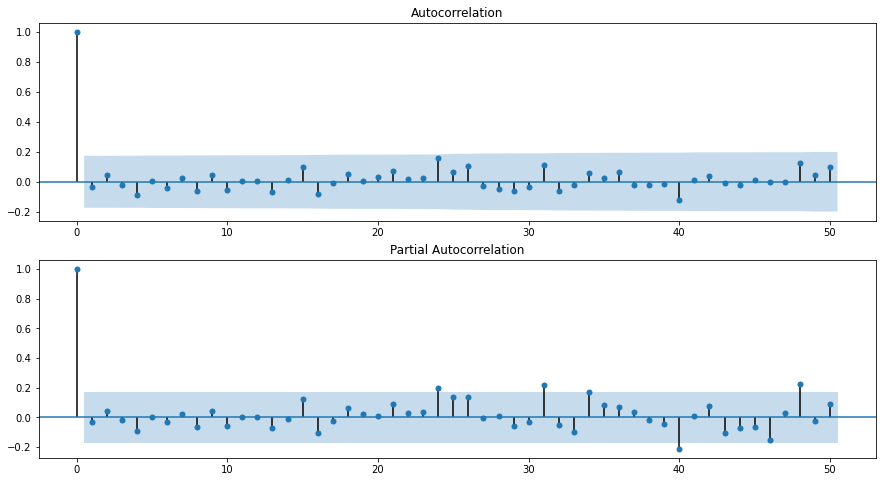

In [190]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

ARIMA model MSE:72.6404732954719


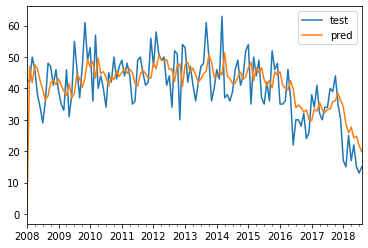

In [191]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(df_train.index[0],df_train.index[-1])
print('ARIMA model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

ARIMA model MSE:20.844506297288493


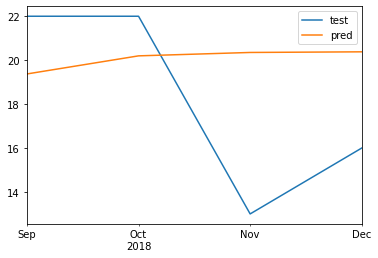

In [192]:
pred = arima.predict(df_test.index[0],df_test.index[-1])
print('ARIMA model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()

# Arimax

In [193]:
nobs = 4
exog_train, exog_test = df.drop(columns="SUICIDE")[0:-nobs], df.drop(columns="SUICIDE")[-nobs:]
arimax = sm.tsa.statespace.SARIMAX(df_train,order=(2,1,1),seasonal_order=(0,0,0,0),exog = exog_train,freq='MS',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SUICIDE   No. Observations:                  128
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -425.422
Date:                Fri, 04 Sep 2020   AIC                            868.845
Time:                        18:18:33   BIC                            894.299
Sample:                    01-01-2008   HQIC                           879.186
                         - 08-01-2018                                         
Covariance Type:                  opg                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
TRANSTORNOS_DE_HUMOR_[AFETIVOS]                       -0.0029      0.029     -0.103      0.918      -0.059       0.053
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL     0.1031      0.028      3.734      0.000       0.049       0.157
NEOPLASIA_MALIGNA_DO_CÓLON                             0.0363      0.040      0.906      0.365      -0.042       0.115
NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL     -0.0128      0.056     -0.227      0.820      -0.123       0.097
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC      0.0080      0.020      0.409      0.683      -0.031       0.047
ar.L1                                                  0.2342      0.135      1.728      0.084      -0.031       0.500
ar.L2                                                 -0.0002      0.109     -0.002      0.998      -0.214       0.213
ma.L1                                                 -0.8789      0.091     -9.665      0.000      -1.057      -0.701
sigma2                                                52.5410      8.403      6.252      0.000      36.071      69.011
===================================================================================
Ljung-Box (Q):                       31.81   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.82   Prob(JB):                         0.24
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMAX model MSE:53.17727019342851


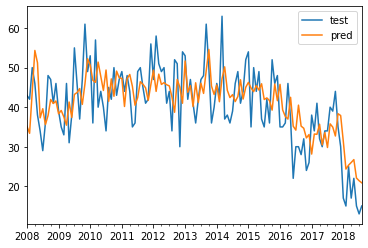

In [194]:
from sklearn.metrics import mean_squared_error
pred = arimax.predict(df_train.index[0],df_train.index[-1],exog = exog_train)
print('ARIMAX model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

ARIMAX model MSE:29.99998400289674


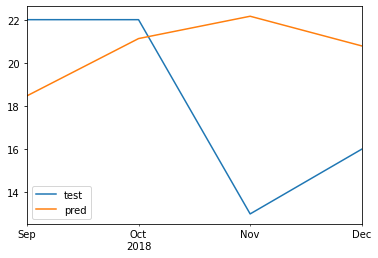

In [195]:
pred = arimax.predict(df_test.index[0],df_test.index[-1],exog = exog_test)
print('ARIMAX model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()

# Sarimax

In [196]:
sarimax = sm.tsa.statespace.SARIMAX(df_train,order=(2,1,1),seasonal_order=(2,1,1,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False,freq='MS').fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            SUICIDE   No. Observations:                  128
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -303.533
Date:                            Fri, 04 Sep 2020   AIC                            631.066
Time:                                    18:18:58   BIC                            660.929
Sample:                                01-01-2008   HQIC                           643.103
                                     - 08-01-2018                                         
Covariance Type:                              opg                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
TRANSTORNOS_DE_HUMOR_[AFETIVOS]                       -0.0468      0.034     -1.394      0.163      -0.113       0.019
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL     0.0786      0.042      1.869      0.062      -0.004       0.161
NEOPLASIA_MALIGNA_DO_CÓLON                             0.0200      0.051      0.394      0.694      -0.079       0.119
NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL      0.0371      0.054      0.681      0.496      -0.070       0.144
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC      0.0183      0.030      0.605      0.545      -0.041       0.077
ar.L1                                                  0.1796      0.193      0.930      0.352      -0.199       0.558
ar.L2                                                  0.0449      0.169      0.266      0.790      -0.286       0.375
ma.L1                                                 -0.8279      0.134     -6.180      0.000      -1.090      -0.565
ar.S.L12                                              -0.1672      0.136     -1.229      0.219      -0.434       0.099
ar.S.L24                                              -0.0196      0.017     -1.172      0.241      -0.052       0.013
ma.S.L12                                              -1.0001    753.952     -0.001      0.999   -1478.719    1476.719
sigma2                                                41.5066   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
===================================================================================
Ljung-Box (Q):                       21.27   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.99   Prob(JB):                         0.78
Heteroskedasticity (H):               1.12   Skew:                            -0.02
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

SARIMAX model MSE:101.11793184824266


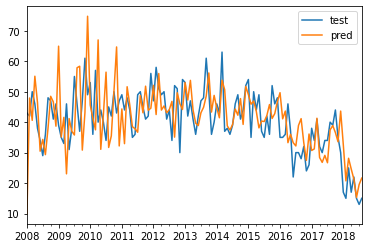

In [197]:
from sklearn.metrics import mean_squared_error
pred = sarimax.predict(df_train.index[0],df_train.index[-1],exog = exog_train)
print('SARIMAX model MSE:{}'.format(mean_squared_error(df_train,pred)))
pd.DataFrame({'test':df_train,'pred':pred}).plot();plt.show()

SARIMAX model MSE:20.62156860645443


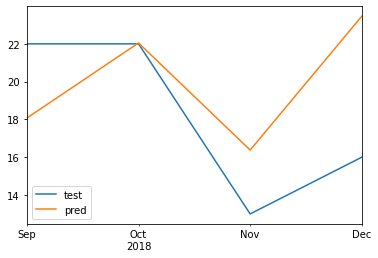

In [198]:
pred = sarimax.predict(df_test.index[0],df_test.index[-1],exog = exog_test)
print('SARIMAX model MSE:{}'.format(mean_squared_error(df_test,pred)))
pd.DataFrame({'test':df_test,'pred':pred}).plot();plt.show()

## 2 - Visualization

Visualizing the time series

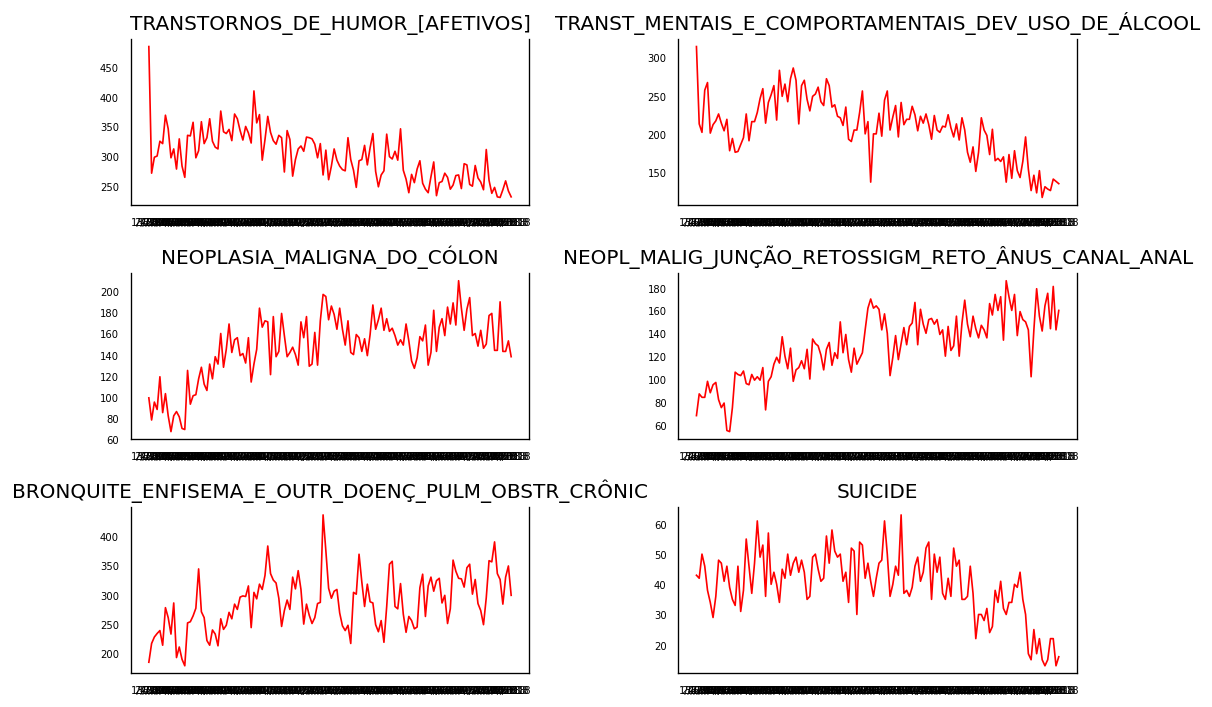

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## 3 - Granger’s causality
Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.
So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,TRANSTORNOS_DE_HUMOR_[AFETIVOS]_x,TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL_x,NEOPLASIA_MALIGNA_DO_CÓLON_x,NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL_x,BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC_x,SUICIDE_x
TRANSTORNOS_DE_HUMOR_[AFETIVOS]_y,1.0000,0.0034,0.0001,0.0000,0.0003,0.0143
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL_y,0.0021,1.0000,0.0001,0.0161,0.0108,0.0052
NEOPLASIA_MALIGNA_DO_CÓLON_y,0.0007,0.4263,1.0000,0.0001,0.0809,0.0740
NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL_y,0.0157,0.0043,0.0166,1.0000,0.3259,0.0217
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC_y,0.0603,0.0466,0.0151,0.0002,1.0000,0.0020
SUICIDE_y,0.0001,0.0013,0.0063,0.0003,0.0080,1.0000


The row are the Response (Y) and the columns are the predictor series (X).

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

- TRANSTORNOS_DE_HUMOR -> suicide? Yes


## 4 - Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

### Order of integration
It is the number of differencing required to make a non-stationary time series stationary.

When you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be **cointegrated**.

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
TRANSTORNOS_DE_HUMOR_[AFETIVOS] ::  68.2      > 83.9383   =>   False
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL ::  34.7      > 60.0627   =>   False
NEOPLASIA_MALIGNA_DO_CÓLON ::  18.72     > 40.1749   =>   False
NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL ::  9.56      > 24.2761   =>   False
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC ::  3.57      > 12.3212   =>   False
SUICIDE ::  0.7       > 4.1296    =>   False


## 5 - Split into train and test

In [12]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(128, 6)
(4, 6)


## 6 - Stationarity
A stationary time series is one whose characteristics like mean and variance does not change over time.

### Augmented Dickey-Fuller Test (ADF Test)

In [13]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [14]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TRANSTORNOS_DE_HUMOR_[AFETIVOS]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7894
 No. Lags Chosen       = 6
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.8222. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7499
 No. Lags Chosen       = 3
 Critical value 1%     = -3.484
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.8334. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "NEOPLASIA_MALIGNA_DO_

In [15]:
df_differenced = df_train.diff().dropna()

Re-running to check for stationarity

In [16]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TRANSTORNOS_DE_HUMOR_[AFETIVOS]" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.634
 No. Lags Chosen       = 5
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.4045
 No. Lags Chosen       = 2
 Critical value 1%     = -3.484
 Critical value 5%     = -2.885
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NEOPLASIA_MALIGNA_DO_CÓLON" 
    --------------------------------------

## 7 - Order (p) of VAR model

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

In [17]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  36.17696443967702
BIC :  37.122391741994186
FPE :  5149374179567146.0
HQIC:  36.56106192265558 

Lag Order = 2
AIC :  35.89566425351931
BIC :  37.66053202559595
FPE :  3901717113617402.0
HQIC:  36.61263686394535 

Lag Order = 3
AIC :  35.91328931543113
BIC :  38.50612881929383
FPE :  4011274108781888.5
HQIC:  36.96656168704559 

Lag Order = 4
AIC :  36.00608226328982
BIC :  39.435575379597644
FPE :  4489540009335183.0
HQIC:  37.39913374857967 

Lag Order = 5
AIC :  35.9853586067399
BIC :  40.26034151100536
FPE :  4548840535898761.0
HQIC:  37.721724360627185 

Lag Order = 6
AIC :  35.98132653381956
BIC :  41.11079348524498
FPE :  4776929883706972.0
HQIC:  38.06459861800744 

Lag Order = 7
AIC :  36.12877310424727
BIC :  42.121880351228675
FPE :  5987448629374566.0
HQIC:  38.56260161221533 

Lag Order = 8
AIC :  36.048720197589134
BIC :  42.91479000409997
FPE :  6181616187012893.0
HQIC:  38.83681440017508 

Lag Order = 9
AIC :  36.05618817665917
BIC :  43.80471297389

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Let's go with Lag Order = 2

Another way of choosing:

In [18]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,37.05,37.19*,1.234e+16,37.11
1,36.21,37.21,5.313e+15,36.61*
2,35.87*,37.74,3.825e+15*,36.63
3,35.96,38.69,4.238e+15,37.07
4,36.11,39.69,5.022e+15,37.56
5,36.06,40.50,4.993e+15,37.87
6,36.04,41.34,5.164e+15,38.19
7,36.14,42.30,6.255e+15,38.64
8,36.05,43.06,6.399e+15,38.90
9,36.09,43.96,7.819e+15,39.28


## 8 - Train the model

In [19]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Sep, 2020
Time:                     19:03:57
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    37.6605
Nobs:                     125.000    HQIC:                   36.6126
Log likelihood:          -3229.68    FPE:                3.90172e+15
AIC:                      35.8957    Det(Omega_mle):     2.15497e+15
--------------------------------------------------------------------
Results for equation TRANSTORNOS_DE_HUMOR_[AFETIVOS]
                                                           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------
const                                                        -1.361612         2.522153           -0.540           0

## 9 - Serial Correlation of Residuals
If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

### Durbin Watson’s Statistic
The value of this statistic can vary between 0 and 4. 
- The closer it is to the value 2, then there is no significant serial correlation. 
- The closer to 0, there is a positive serial correlation
- The closer it is to 4 implies negative serial correlation.

In [20]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

TRANSTORNOS_DE_HUMOR_[AFETIVOS] : 2.27
TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL : 2.06
NEOPLASIA_MALIGNA_DO_CÓLON : 2.05
NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL : 2.07
BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC : 2.1
SUICIDE : 2.16


## 10 - Forecast

In [21]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 2
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2


array([[-16.,  14.,   0.,  22., -54.,  -2.],
       [ -1.,  -3.,  46.,  11., -10.,   2.]])

Forecasting

In [28]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,TRANSTORNOS_DE_HUMOR_[AFETIVOS]_1d,TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL_1d,NEOPLASIA_MALIGNA_DO_CÓLON_1d,NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL_1d,BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC_1d,SUICIDE_1d
9/2018,-13.062269,-22.441316,-29.980643,-18.476791,27.466388,1.199383
10/2018,21.644770,18.329081,-0.307193,11.112635,-3.817585,1.938901
11/2018,-10.944156,-0.072529,13.344782,3.946224,-7.217471,-4.976673
12/2018,-8.173722,-11.293491,-6.159972,-7.852060,6.572285,2.376002


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

## 11 - Invert the transformation

In [29]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [30]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
forecast_array = []
for i in chosen:
    forecast_array.append(i + "_forecast")
df_results.loc[:, forecast_array]

,TRANSTORNOS_DE_HUMOR_[AFETIVOS]_forecast,TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL_forecast,NEOPLASIA_MALIGNA_DO_CÓLON_forecast,NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL_forecast,BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC_forecast,SUICIDE_forecast
9/2018,216.937731,105.558684,160.019357,156.523209,353.466388,16.199383
10/2018,238.582501,123.887766,159.712165,167.635844,349.648803,18.138284
11/2018,227.638345,123.815237,173.056947,171.582069,342.431332,13.161612
12/2018,219.464623,112.521746,166.896974,163.730009,349.003617,15.537613


## 12 - Plotting the results

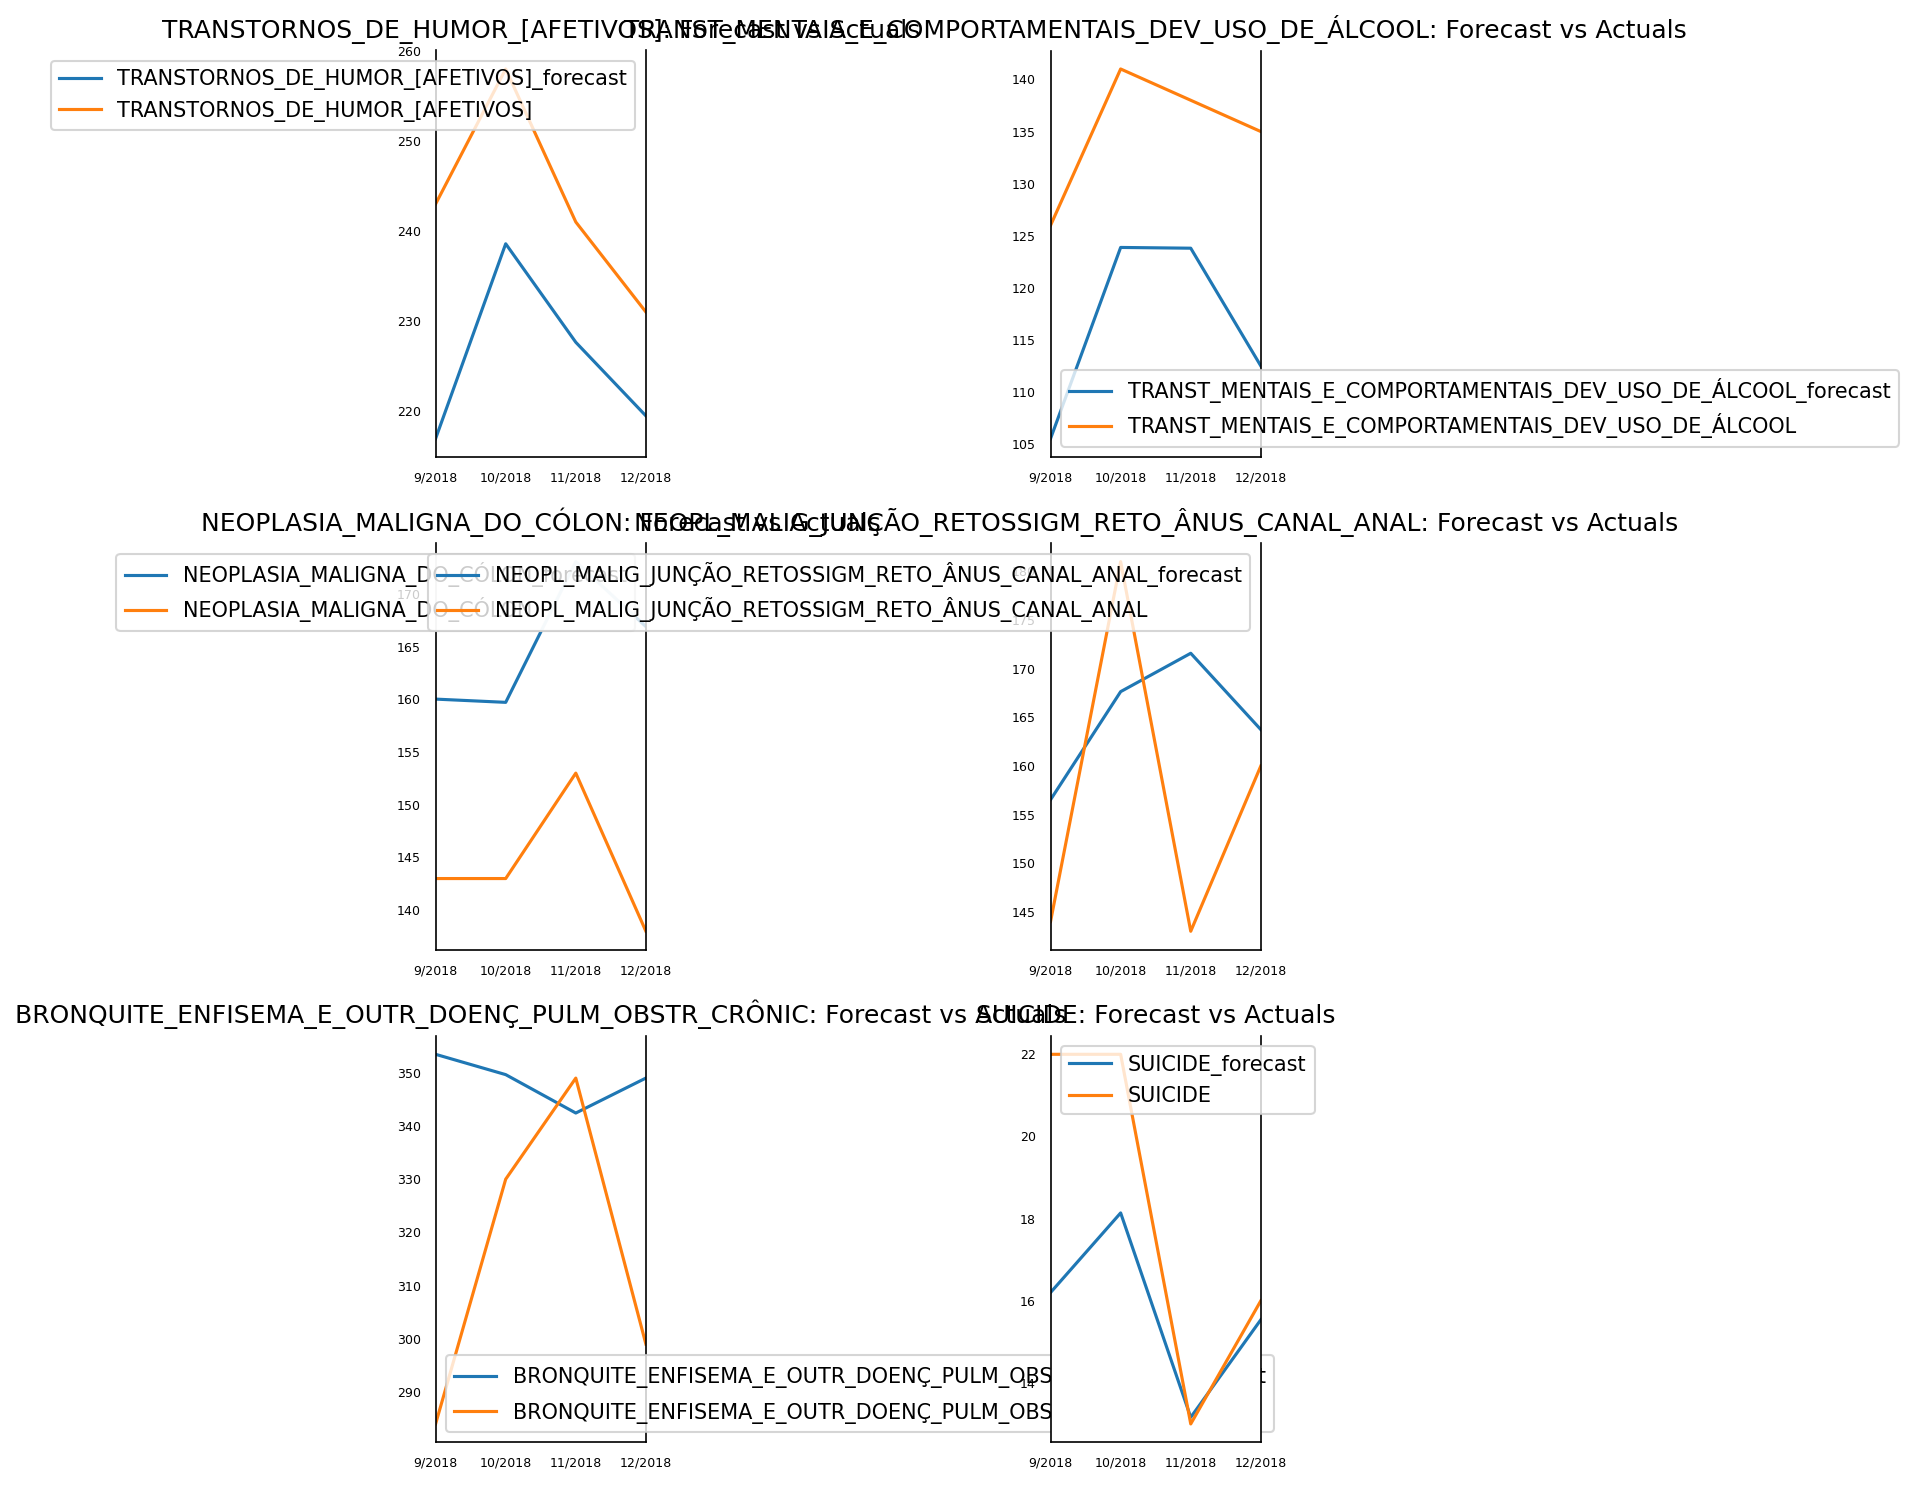

In [31]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## 13 - Evaluating forecast

In [32]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for i in chosen:
    print('Forecast Accuracy of: ' + i)
    accuracy_prod = forecast_accuracy(df_results[i + '_forecast'].values, df_test[i])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))
    print("\n")

Forecast Accuracy of: TRANSTORNOS_DE_HUMOR_[AFETIVOS]
mape   :  0.072
me     :  -17.5942
mae    :  17.5942
mpe    :  -0.072
rmse   :  18.4924
corr   :  0.8102
minmax :  0.072


Forecast Accuracy of: TRANST_MENTAIS_E_COMPORTAMENTAIS_DEV_USO_DE_ÁLCOOL
mape   :  0.1382
me     :  -18.5541
mae    :  18.5541
mpe    :  -0.1382
rmse   :  18.8226
corr   :  0.9403
minmax :  0.1382


Forecast Accuracy of: NEOPLASIA_MALIGNA_DO_CÓLON
mape   :  0.1441
me     :  20.6714
mae    :  20.6714
mpe    :  0.1441
rmse   :  21.2501
corr   :  0.5957
minmax :  0.125


Forecast Accuracy of: NEOPL_MALIG_JUNÇÃO_RETOSSIGM_RETO_ÂNUS_CANAL_ANAL
mape   :  0.096
me     :  7.8678
mae    :  14.5499
mpe    :  0.0591
rmse   :  17.0754
corr   :  0.2261
minmax :  0.0858


Forecast Accuracy of: BRONQUITE_ENFISEMA_E_OUTR_DOENÇ_PULM_OBSTR_CRÔNIC
mape   :  0.1225
me     :  33.1375
mae    :  36.4219
mpe    :  0.1131
rmse   :  44.0317
corr   :  -0.8688
minmax :  0.1037


Forecast Accuracy of: SUICIDE
mape   :  0.1201
me     :  -2.4